In [ ]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lg5WLG6yOfH5NkqD3hlr")
project = rf.workspace("test-0j0bi").project("accident-severity-detection-dataset-srhqy-cdypv")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Accident-Severity-Detection-Dataset-1 in yolov9:: 100%|██████████| 2456/2456 [00:00<00:00, 6410.25it/s]


In [ ]:
import os
os.environ['WANDB_DISABLED'] = 'true'

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov10m.pt")
results = model.train(
    data="/content/Accident-Severity-Detection-Dataset-1/data.yaml",
    epochs=50,
    optimizer="Adam",
    lr0=0.0001,
    imgsz=640,
    seed=42)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 32.1M/32.1M [00:00<00:00, 47.3MB/s]


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10m.pt, data=/content/Accident-Severity-Detection-Dataset-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 755k/755k [00:00<00:00, 18.2MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1     78720  ultralytics.nn.modules.block.SCDown          [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1    228672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /content/Accident-Severity-Detection-Dataset-1/train/labels... 852 images, 2 backgrounds, 0 corrupt: 100%|██████████| 852/852 [00:00<00:00, 1842.95it/s]

train: New cache created: /content/Accident-Severity-Detection-Dataset-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<00:00, 857.32it/s] 

val: New cache created: /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.0001, momentum=0.937) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.04G      2.162      5.468      3.139         10        640: 100%|██████████| 54/54 [00:34<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        186        189      0.303      0.177      0.159      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.01G      1.923      2.852      2.889          6        640: 100%|██████████| 54/54 [00:37<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]

                   all        186        189      0.361      0.477      0.444      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.97G      1.871      2.503        2.8          5        640: 100%|██████████| 54/54 [00:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]

                   all        186        189      0.587      0.651      0.617      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.97G      1.856      2.318      2.794          5        640: 100%|██████████| 54/54 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        186        189      0.651       0.66      0.726      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.01G       1.82      2.202      2.778         11        640: 100%|██████████| 54/54 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        186        189      0.655      0.659      0.693      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.96G      1.765      2.119      2.725          9        640: 100%|██████████| 54/54 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]

                   all        186        189      0.657      0.655      0.697      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.01G       1.76      2.054      2.743         10        640: 100%|██████████| 54/54 [00:33<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        186        189      0.543      0.691      0.667       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.95G      1.677      1.918      2.696         10        640: 100%|██████████| 54/54 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all        186        189      0.685      0.713      0.741      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.99G      1.675      1.896      2.662          8        640: 100%|██████████| 54/54 [00:35<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        186        189      0.683      0.673      0.759      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.97G      1.661      1.879      2.673         10        640: 100%|██████████| 54/54 [00:34<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        186        189      0.541      0.631      0.647      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.02G      1.614      1.654      2.618          4        640: 100%|██████████| 54/54 [00:33<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all        186        189      0.621      0.651      0.689      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.97G      1.653      1.666      2.609          7        640: 100%|██████████| 54/54 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        186        189      0.564      0.786       0.73      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.01G      1.563      1.622       2.53          7        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]

                   all        186        189      0.651      0.769      0.757      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.97G      1.496      1.583      2.499          9        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        186        189      0.771      0.644      0.759      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.02G      1.613      1.706       2.59          7        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.674      0.605      0.717      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.97G      1.526      1.539      2.563          4        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        186        189      0.603      0.612      0.672      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.03G        1.5      1.511      2.512          5        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        186        189       0.69      0.647      0.736      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.97G      1.463      1.383      2.498          9        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.621      0.708      0.709      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.01G      1.447      1.466      2.489         11        640: 100%|██████████| 54/54 [00:32<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.689       0.69      0.745      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.97G      1.483      1.472        2.5          7        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        186        189      0.746      0.639      0.735      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.01G      1.457      1.365      2.486         11        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        186        189      0.825      0.703      0.823      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.96G      1.425      1.346      2.452          6        640: 100%|██████████| 54/54 [00:33<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.677      0.646      0.739      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.01G       1.39       1.34      2.395          9        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.694       0.67      0.754      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.98G      1.429      1.312      2.458         10        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all        186        189      0.641      0.683      0.746      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         9G      1.327      1.265       2.39          7        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.796      0.702      0.793      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.95G      1.354      1.237      2.432          6        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        186        189      0.749      0.707      0.778      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.02G       1.39      1.178       2.43          8        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.711      0.706      0.781      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.96G      1.294      1.148      2.332          5        640: 100%|██████████| 54/54 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        186        189      0.755      0.717      0.792      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.01G      1.292      1.144      2.333          8        640: 100%|██████████| 54/54 [00:32<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        186        189      0.767        0.7      0.773      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.96G      1.308      1.105      2.357          7        640: 100%|██████████| 54/54 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        186        189       0.75       0.66      0.759      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.02G      1.255      1.087        2.3          9        640: 100%|██████████| 54/54 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        186        189      0.689      0.734       0.79      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.98G      1.247      1.089      2.293         11        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        186        189      0.869      0.649       0.79      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         9G      1.265      1.034      2.306          6        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.773      0.682      0.794      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.97G      1.232      1.006      2.265          7        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.803      0.718       0.82       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.02G      1.269      1.039      2.313          7        640: 100%|██████████| 54/54 [00:33<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]

                   all        186        189      0.751      0.746      0.808      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.97G      1.271      1.042       2.31          3        640: 100%|██████████| 54/54 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        186        189      0.763      0.695      0.777      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.02G      1.243      1.036      2.292          7        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189       0.77       0.72      0.813      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.96G      1.192     0.9527      2.254          9        640: 100%|██████████| 54/54 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        186        189      0.772      0.725      0.822      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.01G      1.183     0.9517      2.258          5        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        186        189      0.775      0.683      0.794      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.97G      1.154     0.9061       2.22         11        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.737      0.772      0.798      0.623


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.01G     0.7478     0.4899      1.865          4        640: 100%|██████████| 54/54 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        186        189      0.736      0.698      0.815      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.97G      0.745     0.4509      1.857          4        640: 100%|██████████| 54/54 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        186        189      0.796      0.708      0.813      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         9G     0.7219     0.4194      1.833          5        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        186        189      0.809      0.709      0.821       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.97G     0.6848     0.4057      1.819          5        640: 100%|██████████| 54/54 [00:32<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.781      0.711      0.812      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         9G     0.6804     0.3803      1.808          4        640: 100%|██████████| 54/54 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.782      0.723      0.815       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.97G     0.6542     0.3675      1.784          4        640: 100%|██████████| 54/54 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        186        189      0.877      0.659      0.824      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.02G      0.661     0.3614      1.783          4        640: 100%|██████████| 54/54 [00:32<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        186        189      0.871      0.637      0.812      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.97G     0.6467     0.3622      1.798          5        640: 100%|██████████| 54/54 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.849       0.68       0.81      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.99G     0.6305     0.3489      1.783          4        640: 100%|██████████| 54/54 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.868      0.693      0.828       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.97G     0.6231     0.3371      1.773          4        640: 100%|██████████| 54/54 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        186        189      0.878      0.687      0.833      0.648



50 epochs completed in 0.537 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 33.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16,452,700 parameters, 0 gradients, 63.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]


                   all        186        189      0.808      0.709       0.82      0.659
              moderate         66         66      0.799      0.545      0.727      0.586
                severe        120        123      0.817      0.872      0.913      0.732
Speed: 0.3ms preprocess, 12.4ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")

#**Conf=0.25**

In [ ]:
metrics = model.val(imgsz=640, conf=0.25)
print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16,452,700 parameters, 0 gradients, 63.4 GFLOPs


val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.85it/s]


                   all        186        189       0.82      0.703      0.793       0.66
              moderate         66         66      0.818      0.545      0.698      0.582
                severe        120        123      0.822      0.861      0.887      0.737
Speed: 0.4ms preprocess, 25.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f83aeaeaaa0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0

In [ ]:
model.val(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", split='test', imgsz=640, conf=0.25)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/test/labels.cache... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.10it/s]


                   all        184        191      0.827      0.595       0.73       0.58
              moderate         84         84      0.853      0.415      0.619      0.465
                severe        100        107        0.8      0.776      0.841      0.695
Speed: 0.3ms preprocess, 23.5ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f8313fcdc60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.predict(source="/content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg", save=True, conf=0.25)


image 1/1 /content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg: 640x640 2 moderates, 35.0ms
Speed: 12.4ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'moderate', 1: 'severe'}
 obb: None
 orig_img: array([[[  0,  19,   0],
         [  1,  23,   4],
         [  5,  27,   9],
         ...,
         [ 81,  75,  62],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  2,  24,   5],
         [  4,  26,   7],
         [  6,  28,  10],
         ...,
         [ 80,  74,  61],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  5,  27,   9],
         [  3,  25,   7],
         [  5,  24,   7],
         ...,
         [ 80,  74,  63],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        ...,
 
        [[139, 144, 145],
         [158, 163, 164],
         [176, 181, 182],
         ...,
         [152, 165, 167],
         [153, 166, 168],
         [153, 166, 168]],
 
        [[161, 166, 167],
         [170, 175, 176],
         [179, 184, 185],
         ...,
   

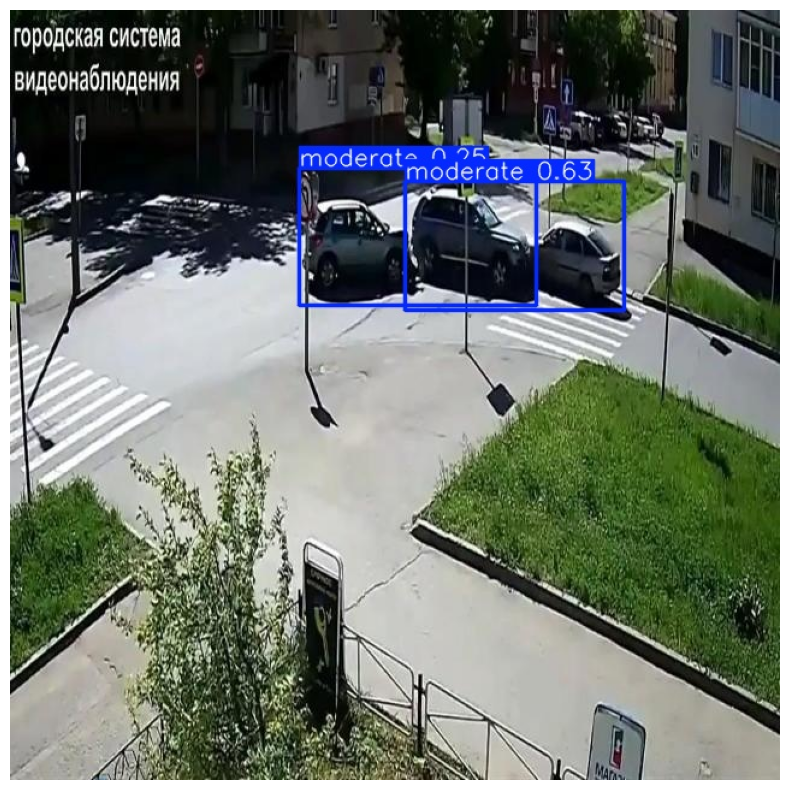

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = "/content/runs/detect/predict/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

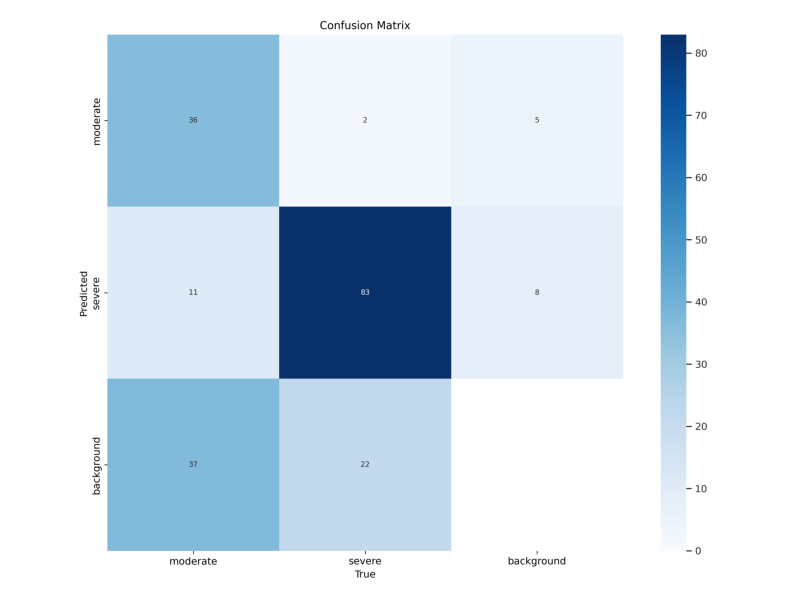

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/val4/confusion_matrix.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


# **Conf=0.5**

In [ ]:
metrics = model.val(imgsz=640, conf=0.5)
print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]


                   all        186        189      0.886      0.633      0.771      0.648
              moderate         66         66      0.861       0.47      0.677      0.562
                severe        120        123      0.912      0.797      0.866      0.733
Speed: 0.7ms preprocess, 24.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val5
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f82d7f87730>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     

In [ ]:
model.val(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", split='test', imgsz=640, conf=0.5)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/test/labels.cache... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.08it/s]


                   all        184        191      0.837      0.552      0.722      0.584
              moderate         84         84      0.857      0.357      0.609      0.472
                severe        100        107      0.816      0.748      0.834      0.697
Speed: 0.3ms preprocess, 23.9ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f82c3941540>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.predict(source="/content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg", save=True, conf=0.5)


image 1/1 /content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg: 640x640 1 moderate, 35.9ms
Speed: 3.6ms preprocess, 35.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'moderate', 1: 'severe'}
 obb: None
 orig_img: array([[[  0,  19,   0],
         [  1,  23,   4],
         [  5,  27,   9],
         ...,
         [ 81,  75,  62],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  2,  24,   5],
         [  4,  26,   7],
         [  6,  28,  10],
         ...,
         [ 80,  74,  61],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  5,  27,   9],
         [  3,  25,   7],
         [  5,  24,   7],
         ...,
         [ 80,  74,  63],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        ...,
 
        [[139, 144, 145],
         [158, 163, 164],
         [176, 181, 182],
         ...,
         [152, 165, 167],
         [153, 166, 168],
         [153, 166, 168]],
 
        [[161, 166, 167],
         [170, 175, 176],
         [179, 184, 185],
         ...,
   

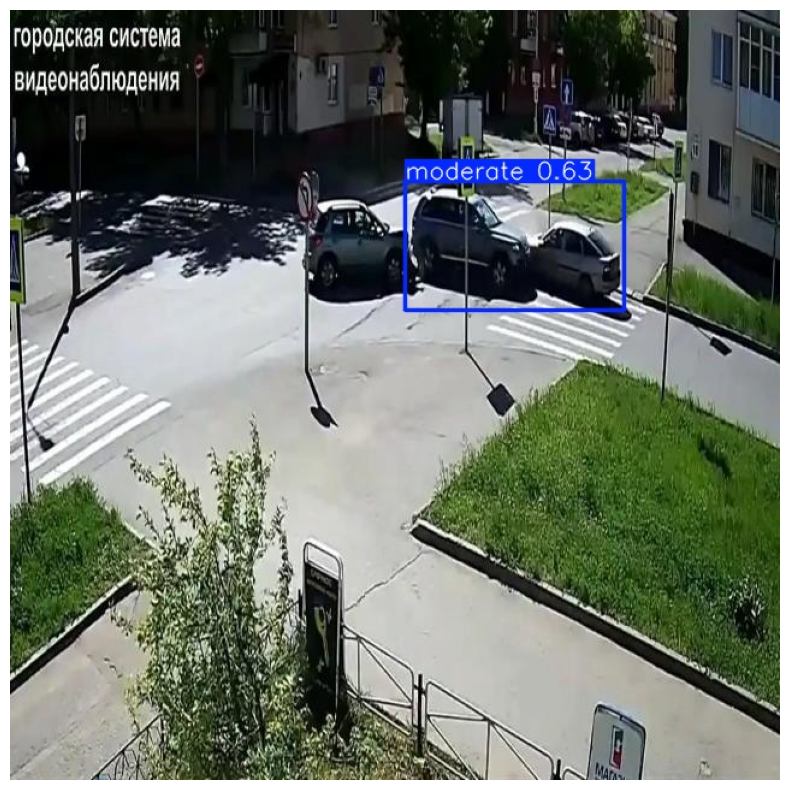

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = "/content/runs/detect/predict/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

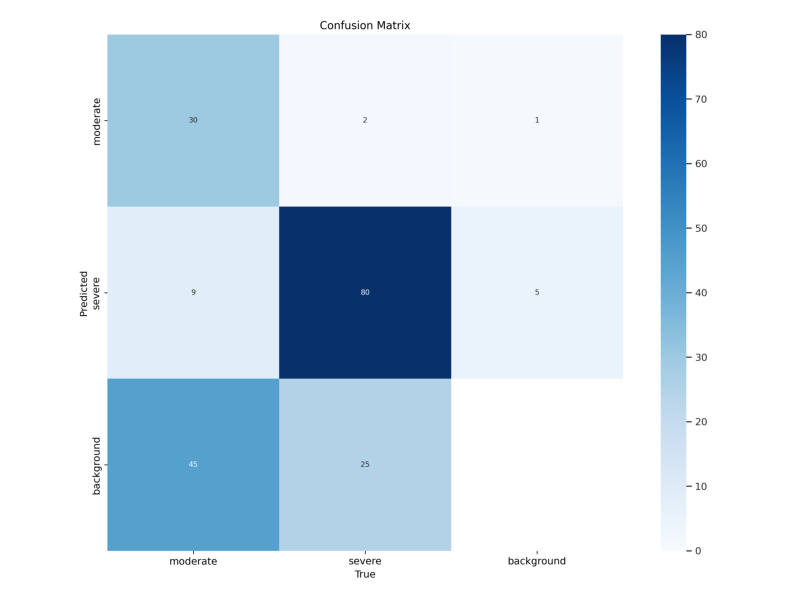

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/val6/confusion_matrix.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


# **Conf=0,75**

In [ ]:
metrics = model.val(imgsz=640, conf=0.75)
print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.87it/s]


                   all        186        189       0.93      0.535      0.739      0.636
              moderate         66         66      0.926      0.379      0.655      0.567
                severe        120        123      0.934      0.691      0.822      0.704
Speed: 0.3ms preprocess, 23.1ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val7
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f83ae386b00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     

In [ ]:
model.val(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", split='test', imgsz=640, conf=0.75)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/test/labels.cache... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.71it/s]


                   all        184        191      0.902      0.493      0.709      0.583
              moderate         84         84      0.889      0.286      0.589      0.464
                severe        100        107      0.915      0.701      0.828      0.702
Speed: 0.9ms preprocess, 24.0ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f83ae118a30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.predict(source="/content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg", save=True, conf=0.75)


image 1/1 /content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg: 640x640 (no detections), 39.1ms
Speed: 6.1ms preprocess, 39.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'moderate', 1: 'severe'}
 obb: None
 orig_img: array([[[  0,  19,   0],
         [  1,  23,   4],
         [  5,  27,   9],
         ...,
         [ 81,  75,  62],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  2,  24,   5],
         [  4,  26,   7],
         [  6,  28,  10],
         ...,
         [ 80,  74,  61],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  5,  27,   9],
         [  3,  25,   7],
         [  5,  24,   7],
         ...,
         [ 80,  74,  63],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        ...,
 
        [[139, 144, 145],
         [158, 163, 164],
         [176, 181, 182],
         ...,
         [152, 165, 167],
         [153, 166, 168],
         [153, 166, 168]],
 
        [[161, 166, 167],
         [170, 175, 176],
         [179, 184, 185],
         ...,
   

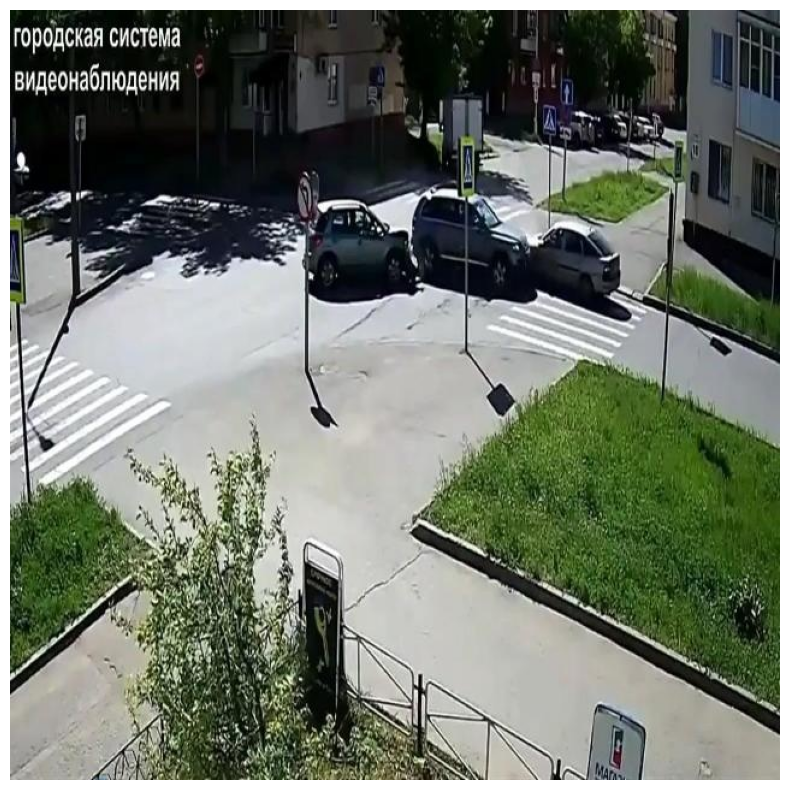

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = "/content/runs/detect/predict/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

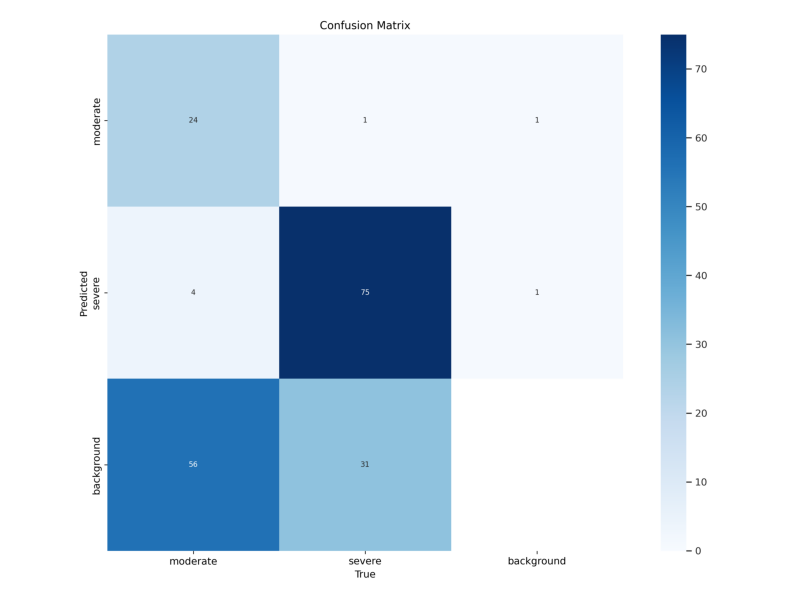

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/val8/confusion_matrix.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
import shutil

shutil.make_archive('runs', 'zip', '/content/runs')


'/content/runs.zip'

In [ ]:
from google.colab import files

files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>